In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import PyQt5

eplus_out_file_1 = "~/Documents/HVAC-RL-Control/src/a3c-res-v0.1/case20-2/train_out.csv"
eplus_out_file_2 = "~/Documents/HVAC-RL-Control/src/a3c-res-v0.1/case20-2/mz-eval_out.csv"
tgt_stpt_name = 'SPACE1-1:Zone Thermostat Heating Setpoint';
cutoff_time = 21;
turnon_time = 6;

In [63]:
def getFullColname(colnames, tgtname):
    for colname in colnames:
        if tgtname in colname:
            return colname;

In [64]:
df_1 = pd.read_csv(eplus_out_file_1)
df_2 = pd.read_csv(eplus_out_file_2)
df_colnames = list(df_1.columns.values)
tgt_stpt_name = getFullColname(df_colnames, tgt_stpt_name)

In [65]:
df_1['Hour'] = pd.to_numeric(df_1['Date/Time'].str.split().str.get(1).str.slice(0, 2))
df_2['Hour'] = pd.to_numeric(df_2['Date/Time'].str.split().str.get(1).str.slice(0, 2))

In [66]:
tgt_stpt_series_1 = df_1[tgt_stpt_name].loc[(df_1['Hour'] >= cutoff_time) | (df_1['Hour'] <= turnon_time)]
tgt_stpt_series_2 = df_2[tgt_stpt_name].loc[(df_2['Hour'] >= cutoff_time) | (df_2['Hour'] <= turnon_time)]

In [67]:
tgt_stpt_series_1.value_counts()

15.0    7675
16.0    1580
17.0     534
18.0     276
19.0     185
20.0     142
21.0     115
22.0     112
23.0      95
24.0      51
25.0      29
26.0       6
Name: SPACE1-1:Zone Thermostat Heating Setpoint Temperature [C](TimeStep), dtype: int64

In [68]:
stpt_frequency_array_1 = tgt_stpt_series_1.value_counts().as_matrix().reshape(1, -1)
stpt_frequency_array_2 = tgt_stpt_series_2.value_counts().as_matrix().reshape(1, -1)
stpt_frequency_array_1 = np.append(tgt_stpt_series_1.value_counts().index.values.reshape(1, -1),
                                 stpt_frequency_array_1, 0).tolist()
stpt_frequency_array_2 = np.append(tgt_stpt_series_2.value_counts().index.values.reshape(1, -1),
                                 stpt_frequency_array_2, 0).tolist()

for stpt in range(15, 31):
    if stpt not in stpt_frequency_array_1[0]:
        stpt_frequency_array_1[0].append(stpt);
        stpt_frequency_array_1[1].append(0);
        
for stpt in range(15, 31):
    if stpt not in stpt_frequency_array_2[0]:
        stpt_frequency_array_2[0].append(stpt);
        stpt_frequency_array_2[1].append(0);
stpt_frequency_array_1 = np.array(stpt_frequency_array_1);
stpt_frequency_array_2 = np.array(stpt_frequency_array_2);
stpt_frequency_array_1

array([[  1.50000000e+01,   1.60000000e+01,   1.70000000e+01,
          1.80000000e+01,   1.90000000e+01,   2.00000000e+01,
          2.10000000e+01,   2.20000000e+01,   2.30000000e+01,
          2.40000000e+01,   2.50000000e+01,   2.60000000e+01,
          2.70000000e+01,   2.80000000e+01,   2.90000000e+01,
          3.00000000e+01],
       [  7.67500000e+03,   1.58000000e+03,   5.34000000e+02,
          2.76000000e+02,   1.85000000e+02,   1.42000000e+02,
          1.15000000e+02,   1.12000000e+02,   9.50000000e+01,
          5.10000000e+01,   2.90000000e+01,   6.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00]])

In [69]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize = 12)

In [70]:
fig, ax = plt.subplots()
width = 0.35  
fig.set_size_inches(14, 10)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
ftsz = 16;

matplotlib.rc('font', **font)
freq_plot_1 = ax.bar(stpt_frequency_array_1[0, :], stpt_frequency_array_1[1, :], width,
                    color = 'r')
freq_plot_2 = ax.bar(stpt_frequency_array_2[0, :] + width, stpt_frequency_array_2[1, :], width,
                    color = 'b')

/home/zhiangz/Documents/HVAC-RL-Control/src/virt_env/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


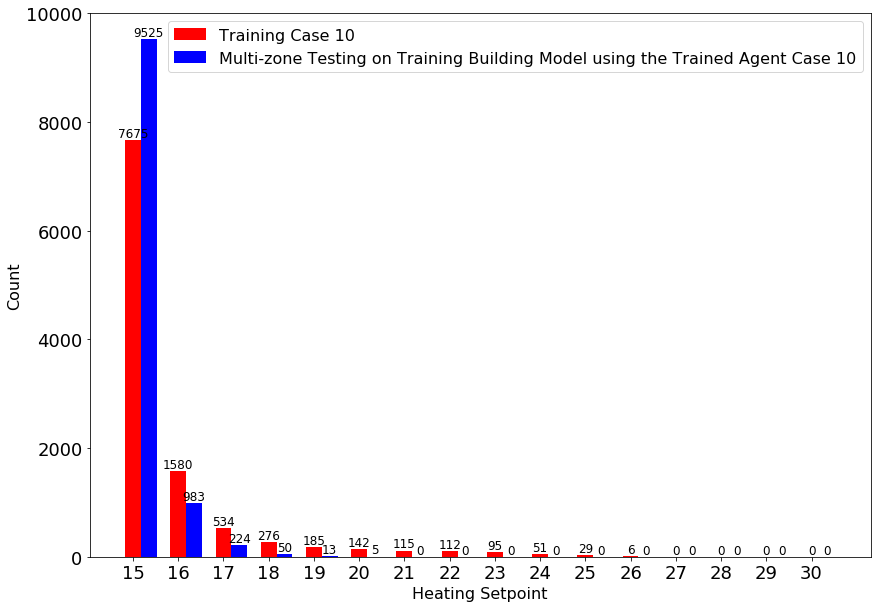

In [71]:
autolabel(freq_plot_1)
autolabel(freq_plot_2)
ax.set_ylabel('Count', fontsize = ftsz)
ax.set_xticks(np.arange(15, 31, 1.0))
ax.set_xlabel('Heating Setpoint', fontsize = ftsz)
#ax.set_title('Heating Setpoint Value Count of Zn1 During 21:00~06:00 of the Simulation Period')
ax.legend((freq_plot_1[0], freq_plot_2[0]), ('Training Case 10', 
                                             'Multi-zone Testing on Training Building Model using the Trained Agent Case 10'),
         fontsize = ftsz)
plt.show()